In [35]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# build an image classifier with sequential API

In [3]:
# load in the fashion dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
# 28 x 28 images. Pixel intensity between 0 and 255
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [12]:
# scale inputs down to between 0 and 1. Also create a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
# this dataset has the following class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

In [16]:
# create a sequential model. 2 hidden layers.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # convert each input image to a 1D array
model.add(keras.layers.Dense(300, activation="relu")) # dense hidden layer with 300 neurons. ReLU activation fn
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer. 1 neuron for each class

In [17]:
# show model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
# can get info on the layers
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[-0.05637977, -0.04533056, -0.01500222, ..., -0.04261567,
         0.04327061, -0.0019164 ],
       [ 0.00607315, -0.02729584, -0.00833037, ..., -0.03540658,
         0.03457255,  0.01585569],
       [ 0.06811599, -0.04267891, -0.01349359, ...,  0.03953161,
         0.06761566, -0.02812106],
       ...,
       [-0.03888199, -0.05855345,  0.01742038, ..., -0.06081466,
        -0.03253949, -0.06198456],
       [ 0.06849773,  0.03552321, -0.05494802, ..., -0.03878939,
         0.0113471 ,  0.0400547 ],
       [ 0.00525142, -0.00841539, -0.06522615, ..., -0.07082544,
        -0.0473453 ,  0.01227697]], dtype=float32)

In [22]:
# compile the model

In [23]:
model.compile(loss="sparse_categorical_crossentropy", # use this as we have sparse labels and and the classes are exclusive
             optimizer="sgd", # stochastic gradient descent
             metrics=["accuracy"])

In [25]:
# train amd evaluate
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7118 - accuracy: 0.7681 - val_loss: 0.5165 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4867 - accuracy: 0.8303 - val_loss: 0.4402 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4441 - accuracy: 0.8448 - val_loss: 0.4077 - val_accuracy: 0.8650
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4171 - accuracy: 0.8536 - val_loss: 0.4066 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8610 - val_loss: 0.3888 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3797 - accuracy: 0.8658 - val_loss: 0.3655 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8697 - val_loss: 0.3680 - val_accuracy:

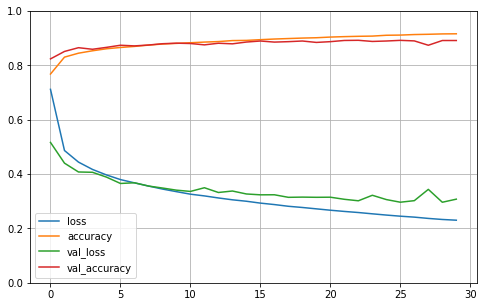

In [28]:
# visualise the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set vertical range
plt.show()

In [29]:
# training and validation accuracy steadily increase
# not too much overfitting as validation and training curves are close

In [30]:
# evaluate on test set before deploying a model to production
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.8205 - accuracy: 0.8527


[63.820499420166016, 0.8526999950408936]

In [31]:
# make predictions 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
# model predicts one probability per class

In [37]:
# to just get class with highest probability
y_pred = np.argmax(model.predict(X_new), axis=-1)

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]

In [40]:
y_new

array([9, 2, 1], dtype=uint8)

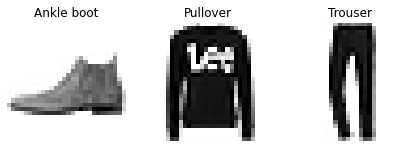

In [41]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.show()